In [1]:
#loading necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

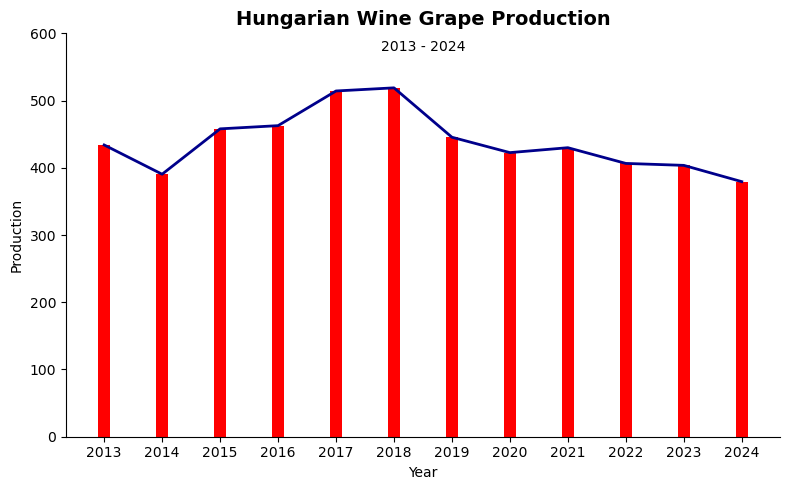

In [2]:
#read in from tab separated data file - see README for source
raw_df = pd.read_csv("../data/processed/estat_tag00121.tsv", sep='\t')

#first column of dataframe is comma separated, so split into 4 columns
raw_df["freq"] = raw_df["freq,crops,strucpro,geo\TIME_PERIOD"].str.split(",").str[0]
raw_df["crops"] = raw_df["freq,crops,strucpro,geo\TIME_PERIOD"].str.split(",").str[1]
raw_df["strucpro"] = raw_df["freq,crops,strucpro,geo\TIME_PERIOD"].str.split(",").str[2]
raw_df["geo"] = raw_df["freq,crops,strucpro,geo\TIME_PERIOD"].str.split(",").str[3]

#reduce rows to only include geographical area of Hungary ("HU") and Grapes for wines ("W1100")
HU_prod = raw_df[(raw_df["geo"] == "HU") & (raw_df["crops"] == "W1100") ]

#delete to free up memory
del raw_df

#transpose data from long to wide for ease of plotting
HU_prod = HU_prod.reset_index()
HU_prod = pd.melt(HU_prod, id_vars="geo", value_vars=['2013 ','2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ', '2023 ', '2024 '])
HU_prod.rename(columns={"variable": "year", "value": "production"}, inplace=True)

HU_prod['year'] = pd.to_numeric(HU_prod["year"])

#strip any white space and letters from "production" column
HU_prod["production"] = HU_prod["production"].replace(r'\s+', '', regex=True)
HU_prod["production"] = HU_prod["production"].replace(r'[a-zA-Z]', '', regex=True)
HU_prod["production"] = pd.to_numeric(HU_prod["production"])


#create plot
fig, ax = plt.subplots(figsize=(8, 5))

# plotting bars showing grape prod by year
ax.bar(HU_prod['year'], HU_prod['production'], 
       color='red', width=0.2, label='Production')

# plotting a line on top
ax.plot(HU_prod['year'], HU_prod['production'], 
        color='darkblue', linewidth=2, label='Trend')

# adding titles and labels
ax.set_title('Hungarian Wine Grape Production', fontsize=14, fontweight='bold', loc='center')
ax.text(0.5, 0.95, '2013 - 2024', ha='center', va='bottom', transform=ax.transAxes, fontsize=10)
ax.set_xlabel('Year')
ax.set_ylabel('Production')

# setting x and y axis labels, limits
ax.set_xticks(range(int(HU_prod['year'].min()), int(HU_prod['year'].max()) + 1))
ax.set_ylim(0, 600)

# removing frames around plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

#save output (plot and csv values) into output/ folder
plt.savefig("../output/HU_grape_plot.png")
HU_prod.to_csv("../output/HU_grape_prod.csv", encoding='utf-8', index=False, header=True)
